In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url, header=None)

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [158]:
df.columns=headers


ValueError: Length mismatch: Expected axis has 32 elements, new values have 26 elements

In [159]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
fuel-type-diesel        uint8
fuel-type-gas           uint8
fuel-type-diesel        uint8
fuel-type-gas           uint8
dtype: object

In [160]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,21,27,13495.0,high,0,1,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,21,27,16500.0,high,0,1,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,19,26,16500.0,medium,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,24,30,13950.0,high,0,1,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,18,22,17450.0,high,0,1,0,1,0,1


In [161]:
df.replace('?',np.nan,inplace=True)

In [162]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,21,27,13495.0,high,0,1,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,21,27,16500.0,high,0,1,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,19,26,16500.0,medium,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,24,30,13950.0,high,0,1,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,18,22,17450.0,high,0,1,0,1,0,1


In [163]:
missing_data=df.isnull()

In [164]:
for data in missing_data.columns.values.tolist():
    print(data)
    print(missing_data[data])
    print("")

symboling
0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: symboling, Length: 201, dtype: bool

normalized-losses
0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: normalized-losses, Length: 201, dtype: bool

make
0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: make, Length: 201, dtype: bool

aspiration
0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: aspiration, Length: 201, dtype: bool

num-of-doors
0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: num-of-doors, Length: 201, dtype: bool

body-s

In [165]:
avg_norm=df["normalized-losses"].astype("float").mean(axis=0)
print("average of normalized losses is,",avg_norm)

average of normalized losses is, 122.0


In [166]:
df['normalized-losses'].replace(np.nan,avg_norm,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [167]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,21,27,13495.0,high,0,1,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,21,27,16500.0,high,0,1,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,19,26,16500.0,medium,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,24,30,13950.0,high,0,1,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,18,22,17450.0,high,0,1,0,1,0,1


In [168]:
missing_data=df.isnull()

In [169]:
for data in missing_data.columns.values.tolist():
    print(data)
    print(missing_data[data].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-system, dtype: int64

bore
False    201
Name: bore, dtype:

ValueError: Grouper for 'fuel-type-diesel' not 1-dimensional

In [ ]:
#filling all the nan values with mean value
#bore,stroke,peak-rpm,horsepower
df.columns

In [170]:
avg_bore=df["bore"].astype("float").mean(axis=0)
print("avg of bore is:",avg_bore)
df["bore"].replace(np.nan,avg_bore,inplace=True)

avg_stroke=df["stroke"].astype("float").mean(axis=0)
print("avg of stroke is:",avg_stroke)
df["stroke"].replace(np.nan,avg_stroke,inplace=True)

avg_peak=df["peak-rpm"].astype("float").mean(axis=0)
print(avg_peak,"is the avg peak rpm")
df["peak-rpm"].replace(np.nan,avg_peak,inplace=True)


avg_horsepower=df["horsepower"].astype("float").mean(axis=0)
print("avg of horsepower is:",avg_horsepower)
df["horsepower"].replace(np.nan,avg_horsepower,inplace=True)

avg of bore is: 3.3306915670404207
avg of stroke is: 3.2568740872750612
5117.665367742568 is the avg peak rpm
avg of horsepower is: 103.40298507462687


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [171]:
#replacing num-of -doors with frequency
df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan,"four",inplace=True)

In [172]:
df.dropna(subset=["price"],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [173]:
missing_data=df.isnull().sum()
print(missing_data)

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
horsepower-binned    0
fuel-type-diesel     0
fuel-type-gas        0
fuel-type-diesel     0
fuel-type-gas        0
fuel-type-diesel     0
fuel-type-gas        0
dtype: int64


In [174]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
fuel-type-diesel        uint8
fuel-type-gas           uint8
fuel-type-diesel        uint8
fuel-type-gas           uint8
dtype: object

In [175]:
#converting normalized-losses,bore,stroke,horsepower,peak-rpm,price into proper data types.

In [176]:
df[['bore','stroke']]=df[['bore','stroke']].astype("float")
df[['price']]=df[['price']].astype("float")
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")
df[["horsepower"]]=df[["horsepower"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("int")

In [177]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
fuel-type-diesel        uint8
fuel-type-gas           uint8
fuel-type-diesel        uint8
fuel-type-gas           uint8
dtype: object

In [178]:
#create binning for horsepower columns and group it as high,mdium,low
df["horsepower"]=df["horsepower"].astype(int,copy=True)

In [179]:
bins=np.linspace(min(df["horsepower"])  ,max(df["horsepower"]) ,4)


In [180]:
group_names=['high','medium','low']

In [181]:
df["horsepower-binned"]=pd.cut(df["horsepower"],bins,labels=group_names,include_lowest=True)

In [182]:
df[["horsepower","horsepower-binned"]].head()

,horsepower,horsepower-binned
0,111,high
1,111,high
2,154,medium
3,102,high
4,115,high


In [183]:
#create dummies variable for fuel-type
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas',
       'fuel-type-diesel', 'fuel-type-gas', 'fuel-type-diesel',
       'fuel-type-gas'],
      dtype='object')

In [184]:
df['fuel-type'].value_counts()

KeyError: 'fuel-type'

In [185]:
dummy_variable1=pd.get_dummies(df["fuel-type"])
dummy_variable1.head()

KeyError: 'fuel-type'

In [186]:
#renaming the columns of gas and diesel
dummy_variable1.rename(columns={"diesel":"fuel-type-diesel", "gas" : "fuel-type-gas"} ,inplace=True)

In [187]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

KeyError: "['fuel-type'] not found in axis"

In [188]:
df=pd.concat([df ,dummy_variable1],axis=1)

In [189]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,1,0,1,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,1,0,1,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,0,1,0,1,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,0,1,0,1,0,1,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,0,1,0,1,0,1,0,1,0,1


In [190]:
df.tail(20)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
181,2,94,volkswagen,std,four,sedan,fwd,front,97.3,171.7,...,0,1,0,1,0,1,0,1,0,1
182,2,94,volkswagen,std,four,sedan,fwd,front,97.3,171.7,...,0,1,0,1,0,1,0,1,0,1
183,2,94,volkswagen,turbo,four,sedan,fwd,front,97.3,171.7,...,1,0,1,0,1,0,1,0,1,0
184,2,94,volkswagen,std,four,sedan,fwd,front,97.3,171.7,...,0,1,0,1,0,1,0,1,0,1
185,3,122,volkswagen,std,two,convertible,fwd,front,94.5,159.3,...,0,1,0,1,0,1,0,1,0,1
186,3,256,volkswagen,std,two,hatchback,fwd,front,94.5,165.7,...,0,1,0,1,0,1,0,1,0,1
187,0,122,volkswagen,std,four,sedan,fwd,front,100.4,180.2,...,0,1,0,1,0,1,0,1,0,1
188,0,122,volkswagen,turbo,four,sedan,fwd,front,100.4,180.2,...,1,0,1,0,1,0,1,0,1,0
189,0,122,volkswagen,std,four,wagon,fwd,front,100.4,183.1,...,0,1,0,1,0,1,0,1,0,1
190,-2,103,volvo,std,four,sedan,rwd,front,104.3,188.8,...,0,1,0,1,0,1,0,1,0,1


In [191]:
#exploratory data analysis for all variable and model development of of data
#EDA

In [192]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas',
       'fuel-type-diesel', 'fuel-type-gas', 'fuel-type-diesel',
       'fuel-type-gas', 'fuel-type-diesel', 'fuel-type-gas',
       'fuel-type-diesel', 'fuel-type-gas'],
      dtype='object')

In [193]:
#importing reg plot with scattered lines for horsepower,

(0.0, 47543.0758934814)

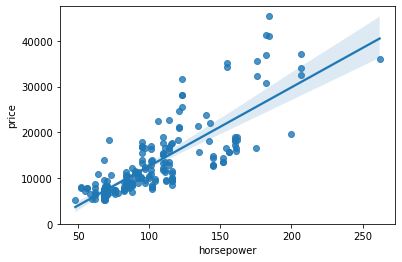

In [194]:

sns.regplot(x="horsepower",y="price",data=df)
plt.ylim(0,)

In [195]:
#finding pearson correlation
df[["horsepower","price"]].corr()
print("horsepower is good postive predictor of price and value is close to 1 i.e 0.8096")

horsepower is good postive predictor of price and value is close to 1 i.e 0.8096


(0.0, 47414.1)

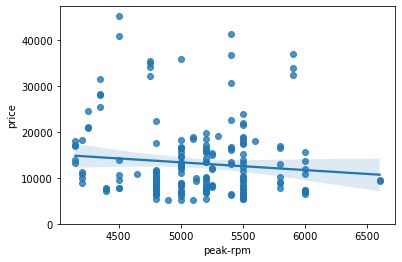

In [196]:
#finding pearson correlation between peak-rpm and regplot



sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [197]:
df[['peak-rpm','price']].corr()
print("peak rpm is weak predictor of price")

peak rpm is weak predictor of price


(0.0, 52943.66180110676)

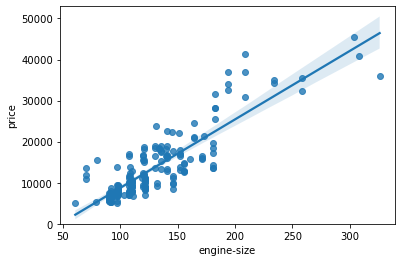

In [198]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

In [199]:
df[["engine-size","price"]].corr()
print("engine-size is good predictor of price")

engine-size is good predictor of price


(0.0, 48179.198676143016)

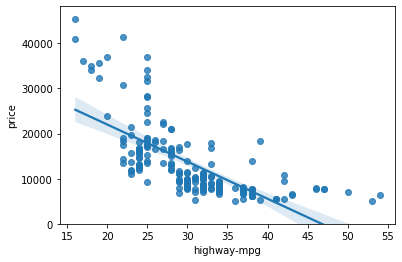

In [200]:
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

In [201]:
df[["highway-mpg","price"]].corr()
print("highway-mpg is moderate predictor of price")

highway-mpg is moderate predictor of price


In [202]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas',
       'fuel-type-diesel', 'fuel-type-gas', 'fuel-type-diesel',
       'fuel-type-gas', 'fuel-type-diesel', 'fuel-type-gas',
       'fuel-type-diesel', 'fuel-type-gas'],
      dtype='object')

In [203]:
df["curb-weight"].head()

0    2548
1    2548
2    2823
3    2337
4    2824
Name: curb-weight, dtype: int64

(0.0, 47758.54336035068)

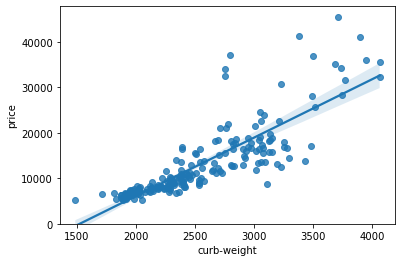

In [204]:
sns.regplot(x="curb-weight",y="price",data=df)
plt.ylim(0,)

In [205]:
df[["curb-weight","price"]].corr()
print("curb-weight good predictor of price")

curb-weight good predictor of price


In [206]:
#applying regression to values

In [207]:
#simple linear regression
from sklearn.linear_model import LinearRegression

In [208]:
lm=LinearRegression()
lm

LinearRegression()

In [209]:
x=df[["engine-size"]]
y=df["price"]

In [210]:
lm.fit(x,y)

LinearRegression()

In [211]:
lm.predict(x)

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775, 14729.62322775, 14729.62322775, 14729.62322775,
       13895.32314929, 10057.54278839, 10057.54278839, 19401.70366711,
       19401.70366711, 19401.70366711, 26910.40437322, 26910.40437322,
       26910.40437322,  2215.1220509 ,  7054.06250595,  7054.06250595,
        7054.06250595,  7054.06250595,  8388.94263148,  7054.06250595,
        7054.06250595,  7054.06250595,  8388.94263148, 12393.58300807,
       18066.82354158,  7387.78253733,  7387.78253733,  5218.60233334,
        7387.78253733,  7387.78253733,  7387.78253733,  7387.78253733,
       10391.26281977, 10391.26281977, 10391.26281977, 10391.26281977,
       10391.26281977, 10391.26281977, 10558.12283547, 11893.002961  ,
       35086.5451421 , 35086.5451421 , 46433.02620912,  7220.92252164,
        7220.92252164,  7220.92252164,  7220.92252164,  7220.92252164,
        3716.86219212,  3716.86219212,  3716.86219212,  5385.46234903,
      

In [212]:
lm.intercept_

-7963.338906281049

In [213]:
lm.coef_

array([166.86001569])

In [214]:
df[['engine-size','price']].head()

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [215]:
price=-7963.338906281049+166.86001569*152

In [216]:
print(price)

17399.383478598953


In [217]:
lm1=LinearRegression()
lm1

LinearRegression()

In [218]:
X=df[["highway-mpg"]]
Y=df["price"]

In [219]:
lm1.fit(X,Y)

LinearRegression()

In [220]:
lm1.intercept_

38423.305858157386

In [221]:
lm1.coef_

array([-821.73337832])

In [222]:
price=38423.305858157386-821.73337832*df["highway-mpg"]

In [223]:
print(price)

0      16236.504644
1      16236.504644
2      17058.238022
3      13771.304509
4      20345.171535
           ...     
196    15414.771265
197    17879.971400
198    19523.438157
199    16236.504644
200    17879.971400
Name: highway-mpg, Length: 201, dtype: float64


In [224]:
#now we apply multi-linear regression model to our data variables

In [225]:
lm2=LinearRegression()
lm2

LinearRegression()

In [226]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [227]:
lm2.fit(z,df["price"])

LinearRegression()

In [228]:
lm2.intercept_

-15811.863767729243

In [229]:
lm2.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

In [230]:
price=-15811.863767729243+53.53022809*df['horsepower']+4.70805253*df["curb-weight"]+81.51280006*df["engine-size"]+36.1593925*df["highway-mpg"]

In [231]:
print(price)

0      13699.077002
1      13699.077002
2      19052.713464
3      10620.615242
4      15520.900251
           ...     
196    16694.521102
197    19505.114512
198    20475.221455
199    17803.805005
200    17103.928702
Length: 201, dtype: float64


In [232]:
#now we developed our model we have to visualize this model to get best fit for variable to predict the price of a car

In [233]:
y_hat=lm2.predict(z)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


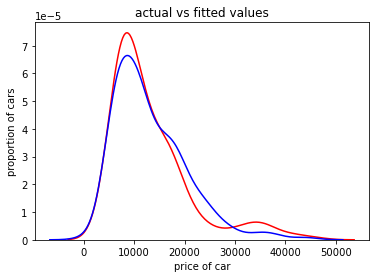

In [234]:
ax1=sns.distplot(df["price"],hist=False,label="actual values",color="r")
sns.distplot(y_hat,hist=False,label="predicted values",color="b")
plt.title("actual vs fitted values")
plt.xlabel("price of car")
plt.ylabel("proportion of cars")
plt.show()
plt.close()

In [235]:
#muliti regression is good for prediction 
#lets calculate rsquare and mse for simple and multi linear regression

In [236]:
#highway_mpg_fit
lm.fit(x,y)
print('The R-square is: ', lm.score(x,y))

The R-square is:  0.7609686443622008


In [237]:
from sklearn.metrics import mean_squared_error

In [238]:
Yhat=lm.predict(x)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [239]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [240]:
#for multi linear regression
# fit the model 
lm.fit(z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


In [241]:
Y_predict_multifit = lm.predict(Z)

In [242]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.349818885


In [243]:
#best fit for our model is multi linear regression 

In [269]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,1,0,1,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,1,0,1,0,1,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,0,1,0,1,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,0,1,0,1,0,1,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,0,1,0,1,0,1,0,1,0,1


In [270]:
df.tail()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,0,1,0,1,0,1,0,1,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,0,1,0,1,0,1,0,1,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,0,1,0,1,0,1,0,1,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,1,0,1,0,1,0,1,0,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,0,1,0,1,0,1,0,1,0,1


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
97,0,106,nissan,std,four,sedan,fwd,front,97.2,173.4,...,0,1,0,1,0,1,0,1,0,1
117,1,154,plymouth,std,four,hatchback,fwd,front,93.7,157.3,...,0,1,0,1,0,1,0,1,0,1
59,0,115,mazda,std,four,sedan,fwd,front,98.8,177.8,...,0,1,0,1,0,1,0,1,0,1
35,0,78,honda,std,four,wagon,fwd,front,96.5,157.1,...,0,1,0,1,0,1,0,1,0,1
165,2,134,toyota,std,two,hatchback,rwd,front,98.4,176.2,...,0,1,0,1,0,1,0,1,0,1
